<a href="https://colab.research.google.com/github/aydawudu/ML_with_PyTorch_and_Sklearn/blob/main/Dimensionality_Reduction_ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis (PCA)

## Data Prep

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Split Data
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [5]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [8]:
# Eigendecomposition of the covariance matrix
cov_mat=np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [12]:
print('\nEigenvector \n', eigen_vecs)


Eigenvector 
 [[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953989e-01 -1.10845657e-01
   1.99483410e-01]
 [-1.54365821e-01  2.89745182e-01  1.96135481e-01 -3.67511070e-01
   6.76487073e-01  6.57772614e-02 -4.05268966e-01  

### Total and explained variance

In [9]:
tot=sum(eigen_vals)
var_exp=[(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)

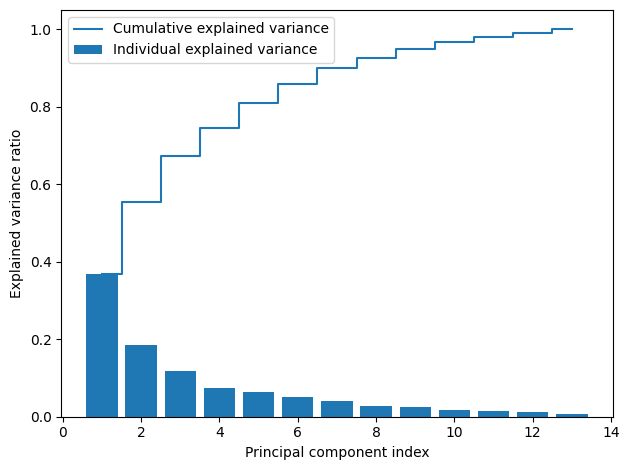

In [11]:
#plot the variance

plt.bar(range(1, 14), var_exp, align='center',
        label="Individual explained variance")
plt.step(range(1, 14), cum_var_exp, where ='mid',
         label= "Cumulative explained variance")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#Feature Transformation

In [13]:
#Make a list of (eigenvalue, eigenvector tupples)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
              for i in range(len(eigen_vals))]

#sort the tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [14]:
w= np.hstack((eigen_pairs[0][1][: , np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W: \n', w)

Matrix W: 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [18]:
#let transform an example
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [19]:
#let transform the entire 124 * 13 dimensional dataset
X_train_pca=X_train_std.dot(w)

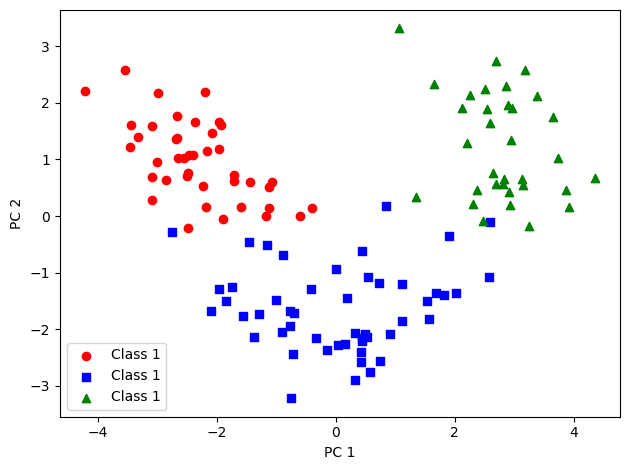

In [27]:
#let's visualize
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train == l, 0],
              X_train_pca[y_train == l, 1],
              c=c, label=f'Class {1}', marker = m)

plt.xlabel('PC 1')
plt.ylabel( 'PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Principal component analysis in scikit-learn

In [28]:
from sklearn.decomposition import PCA

pca=PCA()
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

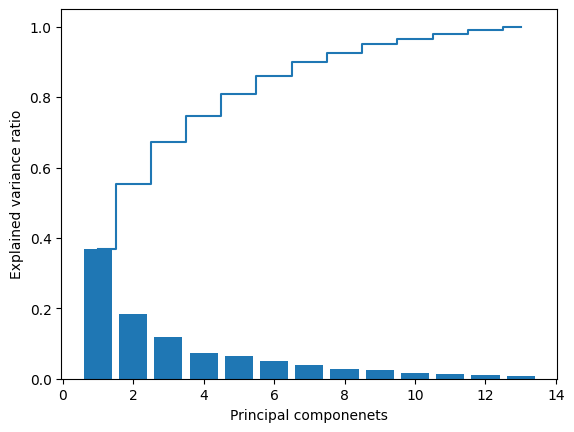

In [29]:
plt.bar(range(1,14), pca.explained_variance_ratio_, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal componenets')
plt.show()

In [30]:
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

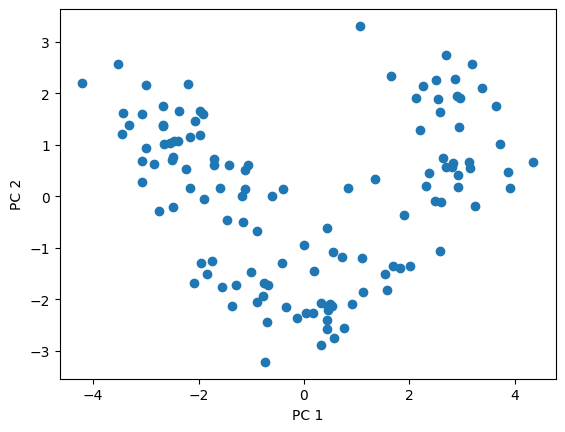

In [31]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

The data is more spread out on PC1 than PC2

Using PCA class from Scikit-learn on the dataset, classify the transformed explained using Logistic Regression, and visualize the decisions region using the plot_decision_function.

In [32]:
#let make the plot decision function

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  #setup marker generator and color map
  markers= ('o', 's', '^', 'v', '<')
  colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap=ListedColormap(colors[:len(np.unique(y))])

  #plot the decision surface
  x1_min, x1_max =X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab=classifier.predict(np.array([xx1.ravel(),  xx2.ravel()]).T)
  lab=lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #plot the class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y= X[y == cl, 1],
                alpha = 0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')

In [33]:
#Training logistic regression classifier using the first 2 principal components.
from sklearn.linear_model import LogisticRegression

pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca =pca.transform(X_test_std)

lr=LogisticRegression(multi_class='ovr', random_state=1, solver = 'lbfgs')
lr=lr.fit(X_train_pca, y_train)

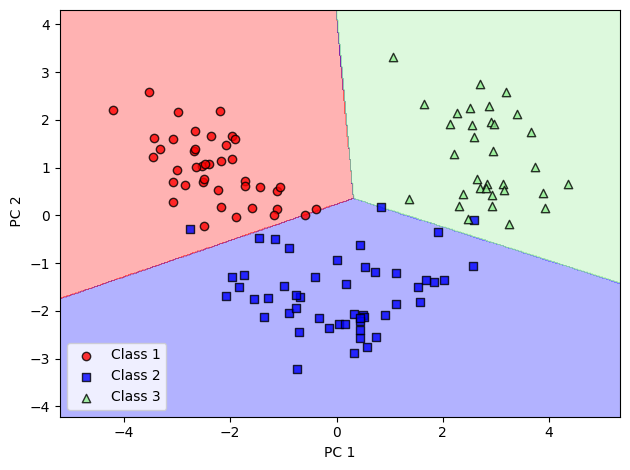

In [34]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel(' PC 2')
plt.legend (loc = 'lower left')
plt.tight_layout()
plt.show()

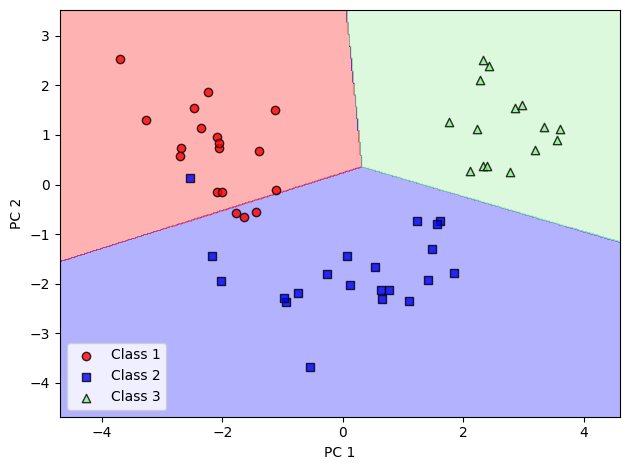

In [35]:
#test
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [37]:
#explained variance ratio
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

##  Assessing feature contributions

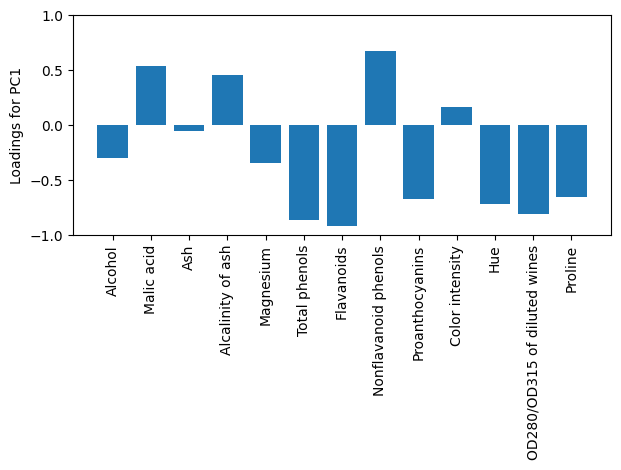

In [41]:
#plot the loadings for the first principal component
loadings=eigen_vecs * np.sqrt(eigen_vals)

fig, ax = plt.subplots()

ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [43]:
#plot the loadings for the first principal component using sklearn pca
loadings[:, 0]

array([-0.3020184 ,  0.54408942, -0.05600938,  0.45540829, -0.33970111,
       -0.8665386 , -0.9184327 ,  0.67279444, -0.67489496,  0.16623657,
       -0.71769524, -0.81117245, -0.65291742])

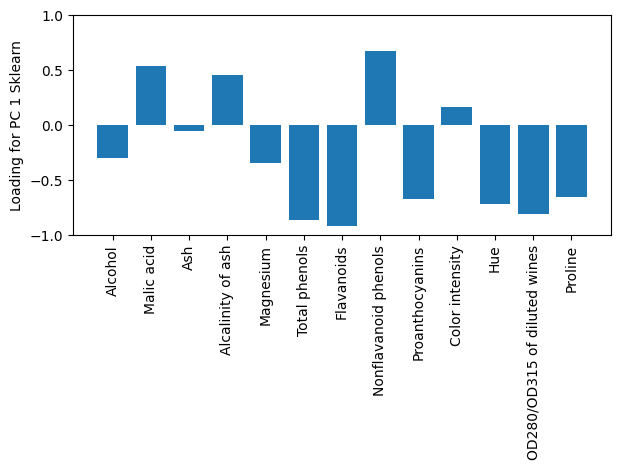

In [46]:
sklearn_loadings=pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(13), sklearn_loadings[:, 0], align= 'center')
ax.set_ylabel('Loading for PC 1 Sklearn')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

#Supervised data compression via linear discriminant analysis

## Principal component analysis versus linear discriminant analysis

### Computing the scatter matrices
Calculate the mean vectors for each class:

In [48]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
  mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
  print(f'MV 1 {label}: {mean_vecs[label - 1]}\n')

MV 1 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 1 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 1 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [50]:
from re import S
#Compute the within-class scatter matrix:
d= 13 # number of features

S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter=np.zeros((d, d)) #scatter matrix for each class
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1) #make column vectors
    class_scatter += (row - mv).dot((row - mv).T)
  S_W += class_scatter

print('Within-class scatter matrix: ' f'{S_W.shape[0]} X {S_W.shape[1]}')

Within-class scatter matrix: 13 X 13


Better: covariance matrix since classes are not equally distributed:

In [51]:
print('Class label distribution:', np.bincount(y_train)[1: ])

Class label distribution: [41 50 33]


In [59]:
#scale individual scatter matrix

d= 13 #number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter=np.cov(X_train_std[y_train == label].T)
  S_W += class_scatter

print('Scaled within class scatter matrix: ', f'{S_W.shape[0]} x {S_W.shape[1]}')

Scaled within class scatter matrix:  13 x 13



Compute the between-class scatter matrix:

In [60]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # make column vector

d = 13  # number of features
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

ValueError: cannot reshape array of size 1 into shape (13,1)

## LDA via scikit-learn

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

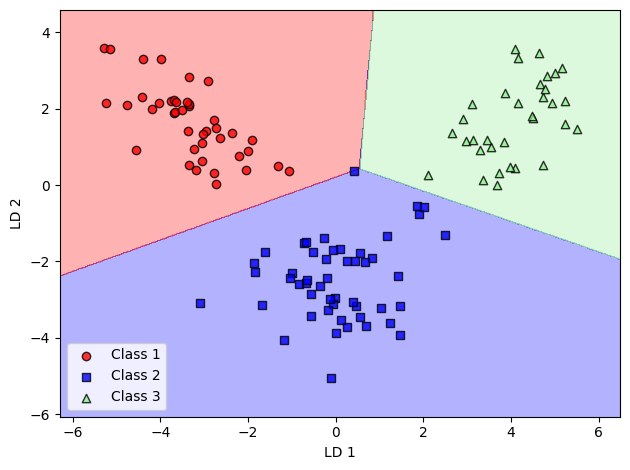

In [63]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr=lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

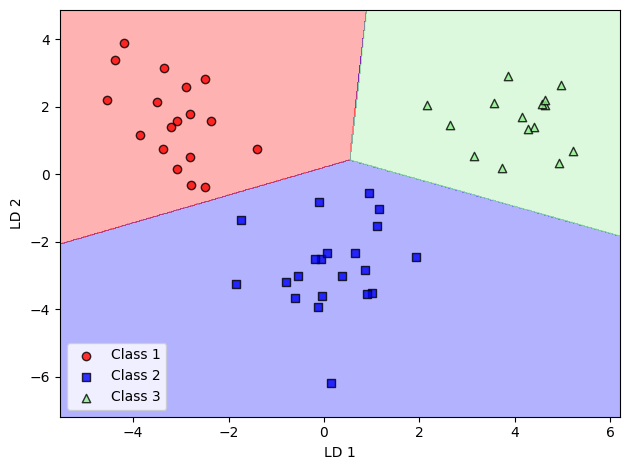

In [64]:
#test data
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_10.png', dpi=300)
plt.show()